In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(True)

load dataset

In [3]:
df = pd.read_csv('C:/Users/aarus/Downloads/Gotem Pumpkins.csv')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce').astype(float)
df['Convex_Area'] = pd.to_numeric(df['Area'], errors='coerce').astype(float)
class_categories = df['Class'].astype('category')
df['Class_Code'] = class_categories.cat.codes
df['Class'] = class_categories.cat.categories[class_categories.cat.codes].values
feature_columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness']
target_column = 'Class_Code'

sigmoid function 

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

training function with stochastic gradient descent with L2 regularisation

In [5]:
def train(X_train, y_train, n, steps, lambda_reg=0.1):
    feature_count = X_train.shape[1]
    weights = np.zeros(feature_count)
    m = len(X_train)    
    for step in range(steps):
        for i in range(m):
            x = X_train.iloc[i].to_numpy()
            y = y_train.iloc[i]
            z = np.dot(weights, x)
            p = sigmoid(z)
            gradient = x*(y - p)
            gradient += lambda_reg*weights  #L2 regularisation
            weights += n*gradient
    return weights

prediction function

In [6]:
def predict(x, weights):
    z = np.dot(weights, x)
    p = sigmoid(z)
    return 1 if p > 0.5 else 0

test function

In [7]:
def test(X_test, y_test, weights):
    correct = 0
    for i in range(len(y_test)):
        x = X_test.iloc[i].to_numpy()
        actual = y_test.iloc[i]
        prediction = predict(x, weights)
        if prediction == actual:
            correct += 1
    return correct / len(y_test)

spliting of data and standardisation

In [8]:
X = df[feature_columns]
y = df[target_column]

def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

X_scaled = standardize(X)

model training

In [9]:
rate = 0.0001  #Learning rate
epoch = 500  #Numberof epochs
lambda_reg = 0.1  #Regularisation strength
w = train(X_scaled, y, rate, epoch, lambda_reg)

C:\Users\aarus\AppData\Local\Temp\ipykernel_16024\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


testing accuracy

In [10]:
accuracy = test(X_scaled, y, w)
print("Final accuracy:", accuracy)
print(w)

Final accuracy: 0.871
[  271.94214593   591.08856503  2452.21904473 -3240.965429
   271.94214593  -376.12148534  3696.45542079  4188.19082069
   871.18720645 -2613.72560239  4407.10868412 -4338.35356833]


C:\Users\aarus\AppData\Local\Temp\ipykernel_16024\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


calculating confusion matrix

In [12]:
def compute_confusion_matrix(y_true, y_pred):
    """ Compute confusion matrix """
    tp = fp = tn = fn = 0
    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            tp += 1
        elif actual == 0 and predicted == 1:
            fp += 1
        elif actual == 0 and predicted == 0:
            tn += 1
        elif actual == 1 and predicted == 0:
            fn += 1
    return tp, fp, tn, fn

plotting confusion matrix

In [13]:
def plot_confusion_matrix(tp, fp, tn, fn):
    """ Plot confusion matrix """
    cm = np.array([[tp, fp],
                   [fn, tn]])
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    thresh = cm.max() / 2
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


evaltuation of model on metrics

C:\Users\aarus\AppData\Local\Temp\ipykernel_16024\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


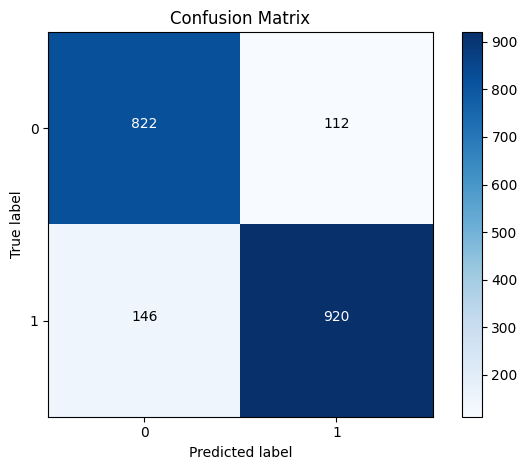

In [15]:
def evaluate_model(X_test, y_test, weights):
    y_pred = [predict(x, weights) for x in X_test.to_numpy()]
    tp, fp, tn, fn = compute_confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(tp, fp, tn, fn)
evaluate_model(X_scaled, y, w)

reading and standardising target dataset

In [16]:
ndf = pd.read_csv('C:/Users/aarus/Downloads/Freyja_Pumpkins.csv')
X_new = ndf[feature_columns]
X_new = standardize(X_new)

predicting required values

In [23]:
label=df['Class'].unique()
def predy(X_test, weights):
    predictions = []
    for i in range(len(X_test)):
        x = X_test.iloc[i].to_numpy()
        prediction = predict(x, weights)
        # Convert binary prediction to class names
        if prediction == 0:
            predictions.append(label[1])
        else:
            predictions.append(label[0])
    return predictions

output into new csv file 

In [24]:
predictions = predy(X_new, w)
ndf['Prediction'] = predictions
ndf.to_csv('C:/Users/aarus/Downloads/pumpkins.csv', index=False)

C:\Users\aarus\AppData\Local\Temp\ipykernel_16024\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
